In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [31]:
path = r'D:\Blessed Ruchi - IT Software\Data Analysis Python\2-Time Series Data Analysis\individual_stocks_5yr'
company_list=['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_df]) 
all_data.shape

(4752, 7)

In [32]:
all_data.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### Analysing the closing prices of all the Stocks

In [33]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [34]:
all_data['date']= pd.to_datetime(all_data['date'])
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [35]:
tech_list = all_data['Name'].unique()

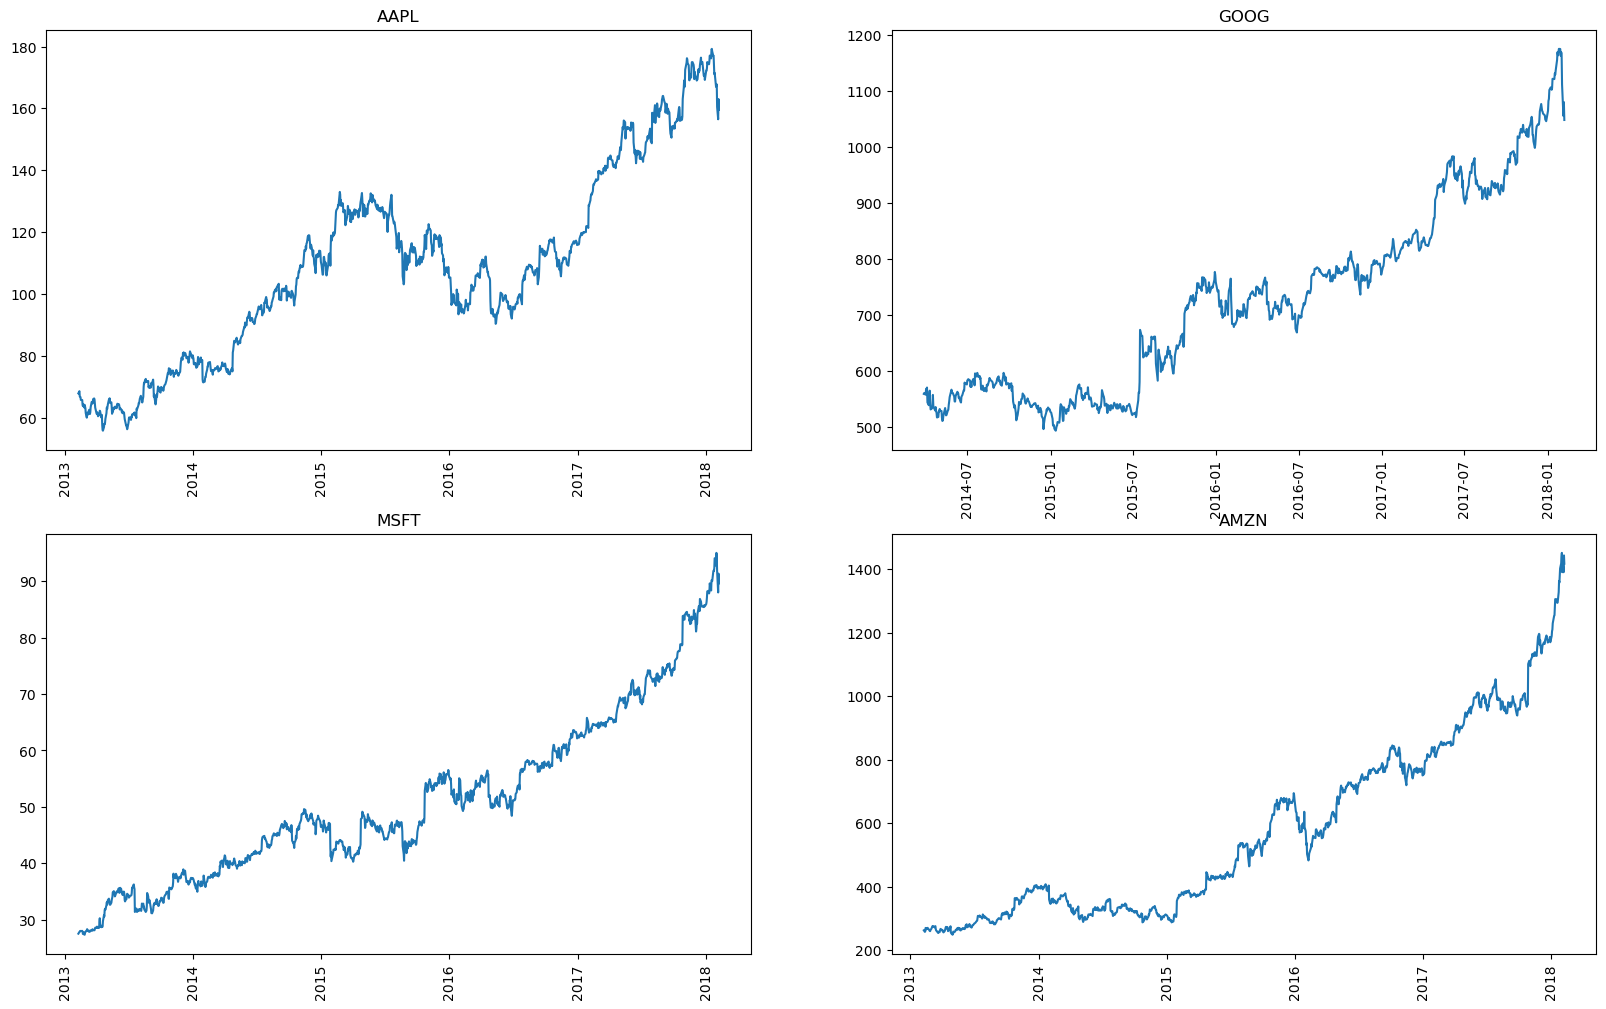

In [36]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df = all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)
    

### Analyze the total volume of stock being traded each day.

In [37]:
! pip install plotly
import plotly.express as px

In [38]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume', title=company)
    fig.show()

### Analyze daily price change in stock

In [39]:
df=pd.read_csv(r'D:\Blessed Ruchi - IT Software\Data Analysis Python\2-Time Series Data Analysis\individual_stocks_5yr/AAPL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [40]:
df['Daily_Price_Change']=df['close']-df['open']
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [41]:
df['1day_%_return'] = ((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,Daily_Price_Change,1day_%_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [42]:
fig=px.line(df,x='date',y='1day_%_return',title=company)
fig.show()

### Analyse monthly mean of close feature

In [43]:
df2=df.copy()
df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_Price_Change    float64
1day_%_return         float64
dtype: object

In [44]:
df2['date']=pd.to_datetime(df2['date'])


In [45]:
df2.set_index('date', inplace=True)
df2.head()

,open,high,low,close,volume,Name,Daily_Price_Change,1day_%_return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [46]:
df2['2013-02-08' : '2013-02-14']


,open,high,low,close,volume,Name,Daily_Price_Change,1day_%_return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


<AxesSubplot:xlabel='date'>

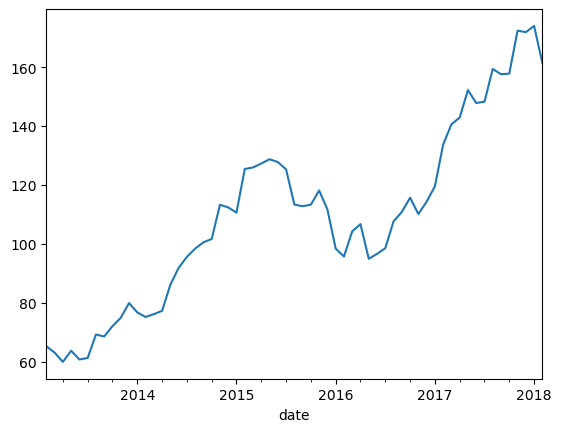

In [47]:
df2['close'].resample('M').mean().plot()

<AxesSubplot:xlabel='date'>

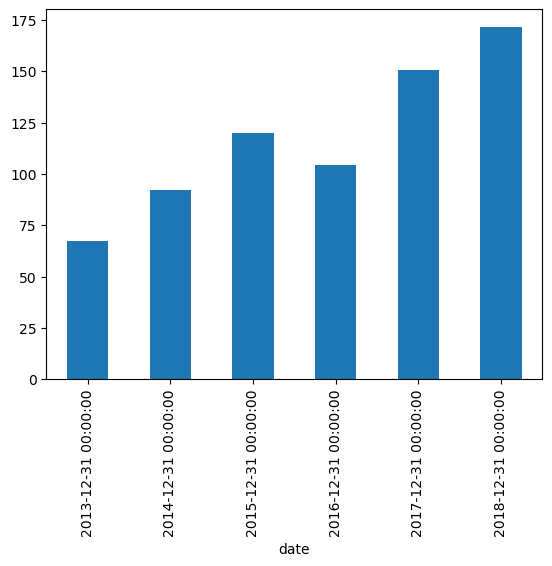

In [48]:
df2['close'].resample('Y').mean().plot(kind='bar')

### Analyze whether stoock prices of these stock company(apple, google, microsoft,amazon) are correlated or not!

In [49]:
apple = pd.read_csv(r'D:\Blessed Ruchi - IT Software\Data Analysis Python\2-Time Series Data Analysis\individual_stocks_5yr/AAPL_data.csv')
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [50]:
amzn=pd.read_csv(r'D:\Blessed Ruchi - IT Software\Data Analysis Python\2-Time Series Data Analysis\individual_stocks_5yr/AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [51]:
msft=pd.read_csv(r'D:\Blessed Ruchi - IT Software\Data Analysis Python\2-Time Series Data Analysis\individual_stocks_5yr/MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [52]:
goog = pd.read_csv(r'D:\Blessed Ruchi - IT Software\Data Analysis Python\2-Time Series Data Analysis\individual_stocks_5yr/GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [53]:
close = pd.DataFrame()


In [55]:
close['apple']=apple['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [56]:
close.head()

,apple,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


In [57]:
import seaborn as sns

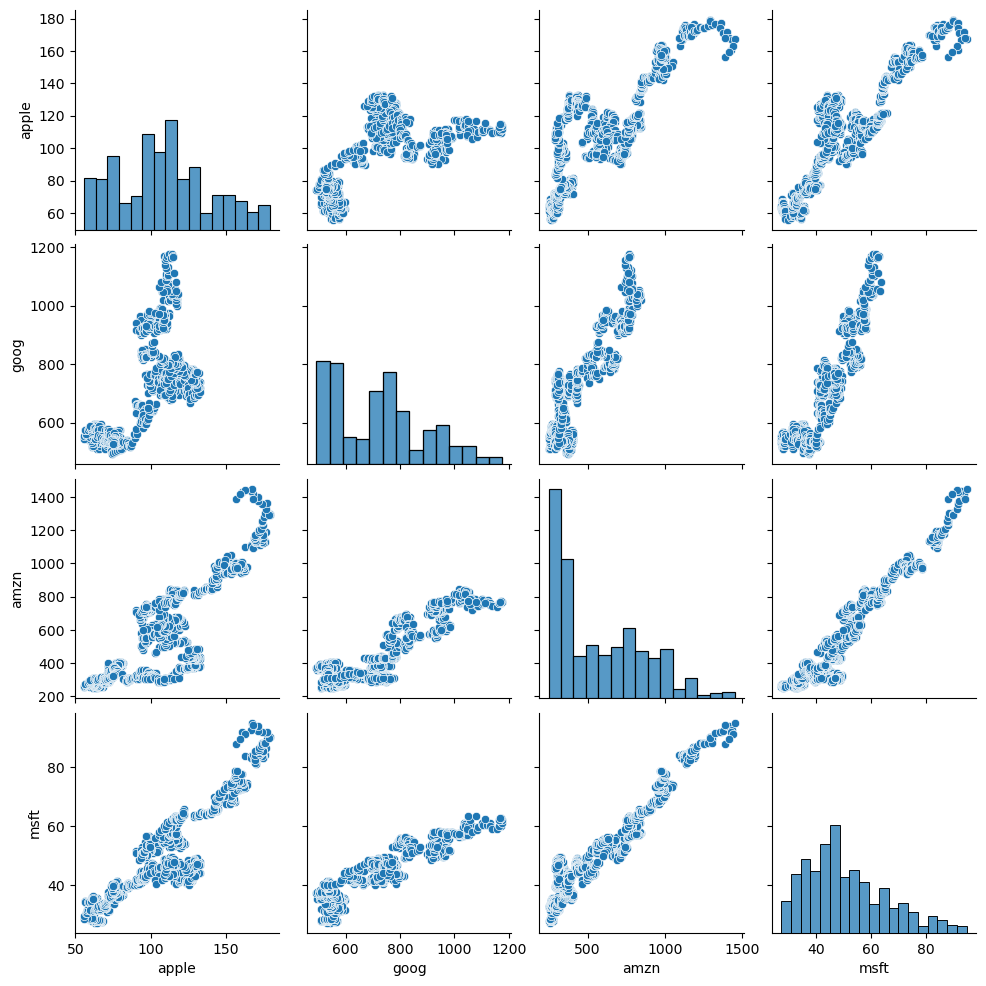

In [58]:
sns.pairplot(data=close)

<AxesSubplot:>

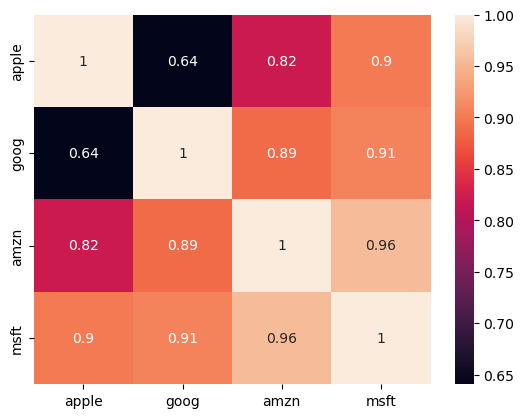

In [59]:
sns.heatmap(close.corr(), annot=True)

### Daily return of each stock and how they are correlated

In [60]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [61]:
data=pd.DataFrame()

In [63]:
data['apple_change'] = ((apple['close']-apple['open'])/apple['close'])*100
data['goog_change'] = ((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change'] = ((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change'] = ((msft['close']-msft['open'])/msft['close'])*100

In [64]:
data.head()

,apple_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


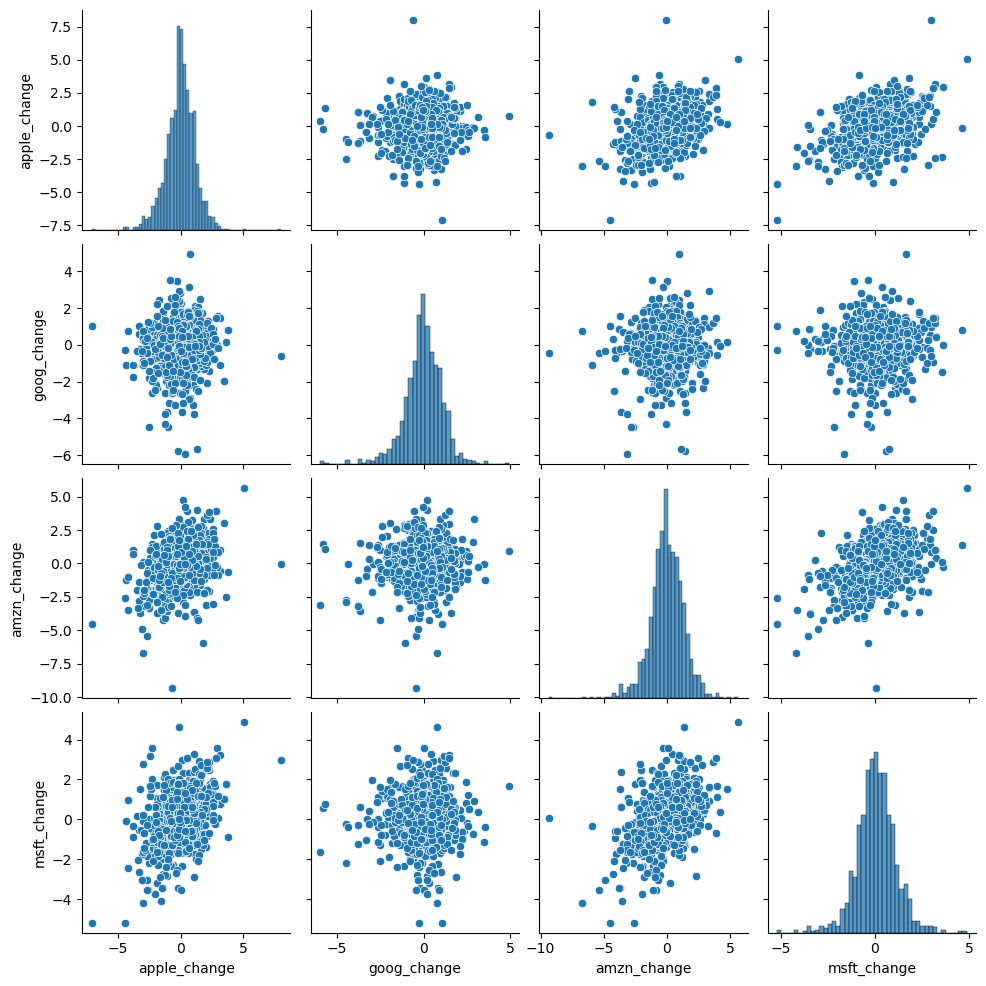

In [65]:
sns.pairplot(data=data)

<AxesSubplot:>

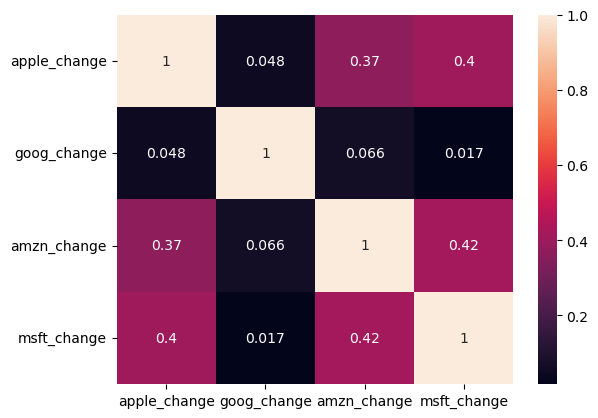

In [66]:
sns.heatmap(data.corr(), annot=True )

### Value at Risk Analysis for Tech Companies

C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='apple_change', ylabel='Density'>

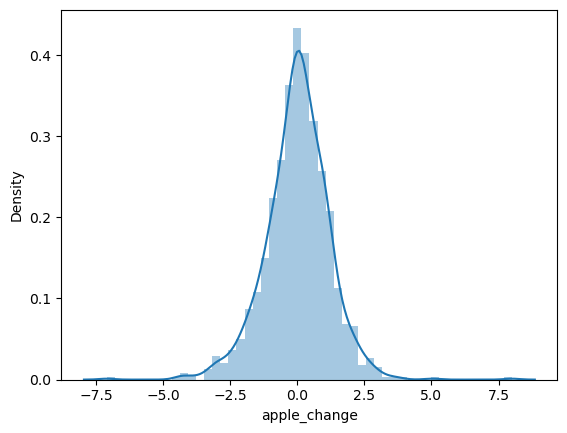

In [67]:
sns.distplot(data['apple_change'])

In [69]:
data['apple_change'].std()

1.1871377131421237

In [70]:
data['apple_change'].std()*2

2.3742754262842474

In [71]:
data['apple_change'].std()*3

3.561413139426371

In [72]:
data['apple_change'].quantile(0.1)

-1.4246644227944307

In [74]:
data.describe()

,apple_change,goog_change,amzn_change,msft_change
count,1259.000000,975.000000,1259.000000,1259.000000
mean,-0.000215,-0.012495,-0.000398,0.076404
std,1.187138,1.092560,1.358679,1.059260
min,-7.104299,-5.952266,-9.363077,-5.177618
25%,-0.658021,-0.551963,-0.738341,-0.509241
50%,0.042230,0.024951,-0.002623,0.061069
75%,0.715427,0.672649,0.852568,0.703264
max,8.000388,4.943550,5.640265,4.861491


In [75]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
